# Test: Correctness Evaluation of Annotat3d Image Processing Operations

This notebook implements bitwise comparisons between ANnotat3d custum operations and well stablished open frameworks for image processing. 

In [1]:
import os
notebook_name = "test_correctness_report_big_image"
output_dir = f"{notebook_name}_plots"
os.makedirs(output_dir, exist_ok=True)
print(f"Plots will be saved to: {output_dir}")

Plots will be saved to: test_correctness_report_big_image_plots


## Import libraries

Assures that the harpia module has already been compiled with cython, before (command: python3 setup.py)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io
from skimage.color import rgb2gray

# workaround to allow importing harpia python module
import sys
sys.path.append("../../")

import harpia.morphology.operations_binary as harpia_binary
import harpia.morphology.operations_grayscale as harpia_grayscale


In [3]:
import harpia
print(harpia.__file__) #assert it is importing the local compilation of harpia package

/ibira/lnls/labs/tepui/home/camila.araujo/work/harpia/tests_python/morphology/../../harpia/__init__.cpython-39-x86_64-linux-gnu.so


## Framework

In [4]:
def custum_line_kernel3D():
    kernel_2d = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]], dtype=np.int32)
    # Stack the 2D kernel to form a 3D kernel (3 layers)
    kernel_3d = np.stack([kernel_2d, kernel_2d, kernel_2d])
    return kernel_3d

In [5]:
def custum_kernel3D():
    kernel_2d = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=np.int32)
    # Stack the 2D kernel to form a 3D kernel (3 layers)
    kernel_3d = np.stack([kernel_2d, kernel_2d, kernel_2d])
    return kernel_3d

In [6]:
def custum_kernel2D():
    kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=np.int32)
    kernel = kernel.reshape(1, kernel.shape[0], kernel.shape[1])
    return kernel

In [7]:
def load_image(path, xsize, ysize, zsize, dtype, dtype_out):
    img = np.fromfile(path, dtype=dtype)
    img = img.reshape((zsize, ysize, xsize))
    img = img.astype(dtype = dtype_out)
    return img

In [8]:
# Function to compare the results
def show_results_diff(result_custum, original_image=None, plot=False, operation = "", framework = "", 
                 slice_num = 0, figsize=(18, 6), save_path=None):  
    fontsize = 18
    # Perform bitwise comparison
    bitwise_diff = np.abs(original_image.astype(np.int32) - result_custum.astype(np.int32))
    
    if(plot):
        if(len(original_image.shape)==3):
            original_slice = original_image[slice_num,:,:]
            slice_groudtruth = result_groudtruth[slice_num,:,:]
            slice_custum = result_custum[slice_num,:,:]
            slice_diff = bitwise_diff[slice_num,:,:]
        # Visual comparison
        plt.figure(figsize=figsize)

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(original_slice, cmap='gray')
        plt.title("Original Image", fontsize = fontsize)
        plt.axis('off')

        # Custum result
        plt.subplot(1, 3, 2)
        plt.imshow(slice_custum, cmap='gray')
        plt.title(f"Annotat3d {operation}", fontsize = fontsize)
        plt.axis('off')

        # Bitwise difference
        plt.subplot(1, 3, 3)
        plt.imshow(slice_diff, cmap='hot')
        plt.title("Bitwise Difference", fontsize = fontsize)
        plt.axis('off')

        plt.tight_layout()
        
        # Save the plot if a save path is provided
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')
        
        plt.show()
    
    return 

In [9]:
def show_results(result_custum, original_image=None, plot=False, operation = "", framework = "", 
                 slice_num = 0, figsize=(18, 6), save_path=None):  
    fontsize = 18
    # Perform bitwise comparison
    bitwise_diff = np.abs(original_image.astype(np.int32) - result_custum.astype(np.int32))
    
    if(plot):
        if(len(original_image.shape)==3):
            original_slice = original_image[slice_num,:,:]
            slice_groudtruth = result_groudtruth[slice_num,:,:]
            slice_custum = result_custum[slice_num,:,:]
            slice_diff = bitwise_diff[slice_num,:,:]
        # Visual comparison
        plt.figure(figsize=figsize)

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_slice, cmap='gray')
        plt.title("Original Image", fontsize = fontsize)
        plt.axis('off')
        
        # Custum result
        plt.subplot(1, 2, 2)
        plt.imshow(slice_custum, cmap='gray')
        plt.title(f"Annotat3d {operation}", fontsize = fontsize)
        plt.axis('off')

        plt.tight_layout()
        
        # Save the plot if a save path is provided
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')
        
        plt.show()
    
    return 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compare the results
def compare_results(result_custum, result_groudtruth, original_image=None, plot=False, operation="", framework="", slice_num=0, figsize=(18, 6), save_path=None):  
    fontsize = 18
    # Perform bitwise comparison
    bitwise_diff = np.abs(result_groudtruth.astype(np.int32) - result_custum.astype(np.int32))
    
    if plot:
        if len(original_image.shape) == 3:
            original_slice = original_image[slice_num, :, :]
            slice_groudtruth = result_groudtruth[slice_num, :, :]
            slice_custum = result_custum[slice_num, :, :]
        
        # Visual comparison without bitwise difference
        plt.figure(figsize=figsize)

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(original_slice, cmap='gray')
        plt.title("Original Image", fontsize=fontsize)
        plt.axis('off')

        # Ground truth result
        plt.subplot(1, 3, 2)
        plt.imshow(slice_groudtruth, cmap='gray')
        plt.title(f"{framework} {operation}", fontsize=fontsize)
        plt.axis('off')

        # Custom result
        plt.subplot(1, 3, 3)
        plt.imshow(slice_custum, cmap='gray')
        plt.title(f"Annotat3d {operation}", fontsize=fontsize)
        plt.axis('off')

        plt.tight_layout()
        
        # Save the plot if a save path is provided
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')
        
        plt.show()
    
    # Return pixel-wise statistics
    total_pixels = np.prod(original_image.shape)
    num_diff_pixels = np.count_nonzero(bitwise_diff)
    print(f"Total pixels: {total_pixels}")
    print(f"Different pixels: {num_diff_pixels}")
    print(f"Accuracy: {((total_pixels - num_diff_pixels) / total_pixels) * 100:.2f}%")
    #print(f"Difference value: {bitwise_diff.mean():.2f} ± {bitwise_diff.std():.2f}")
    
    return


## Morphology grayscale operations in 3D 

In [13]:
'''
# original img
xsize = 190
ysize = 207
zsize_original = 100
zsize = 100
image = load_image("../../example_images/grayscale/crua_A_190x207x100_16b.raw", xsize, ysize, zsize_original,'uint16', 'float32')
image = image[:zsize,:,:] #reduce size
image_slice = image[0,:,:]
image_slice3D = np.expand_dims(image_slice, axis=-1).reshape((1, ysize, xsize))
'''

'\n# original img\nxsize = 190\nysize = 207\nzsize_original = 100\nzsize = 100\nimage = load_image("../../example_images/grayscale/crua_A_190x207x100_16b.raw", xsize, ysize, zsize_original,\'uint16\', \'float32\')\nimage = image[:zsize,:,:] #reduce size\nimage_slice = image[0,:,:]\nimage_slice3D = np.expand_dims(image_slice, axis=-1).reshape((1, ysize, xsize))\n'

In [12]:
# original img
xsize = 2052
ysize = 2052
zsize_original = 2048
zsize = 2048
image = load_image("../../example_images/grayscale/Recon_2052x2052x2048_32bits.raw", xsize, ysize, zsize_original,'float32', 'float32')
image = image[:zsize,:,:] #reduce size
image_slice = image[0,:,:]
image_slice3D = np.expand_dims(image_slice, axis=-1).reshape((1, ysize, xsize))

### Erosion

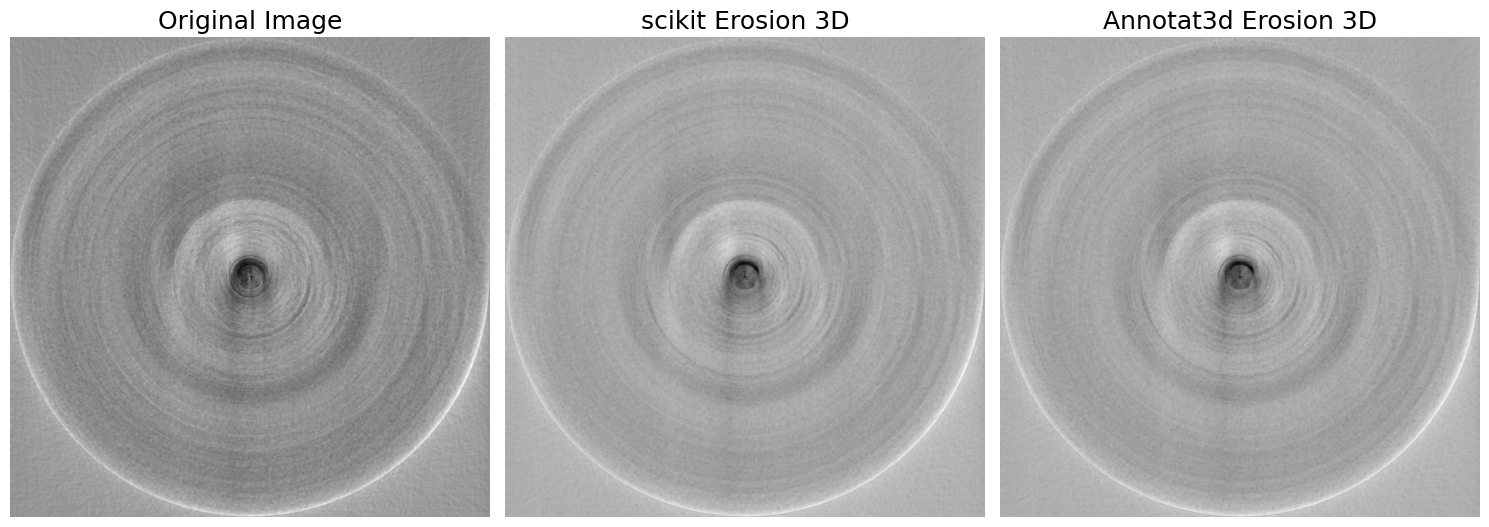

Total pixels: 8623521792
Different pixels: 0
Accuracy: 100.00%


In [15]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.erosion_grayscale(image, kernel, gpuMemory = 0.4)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.erosion(image, selem)

filename = f"{output_dir}/grayscale_erosion.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Erosion 3D", framework="scikit", 
                slice_num=50, figsize = (15,30), save_path=filename)

### Dilation 

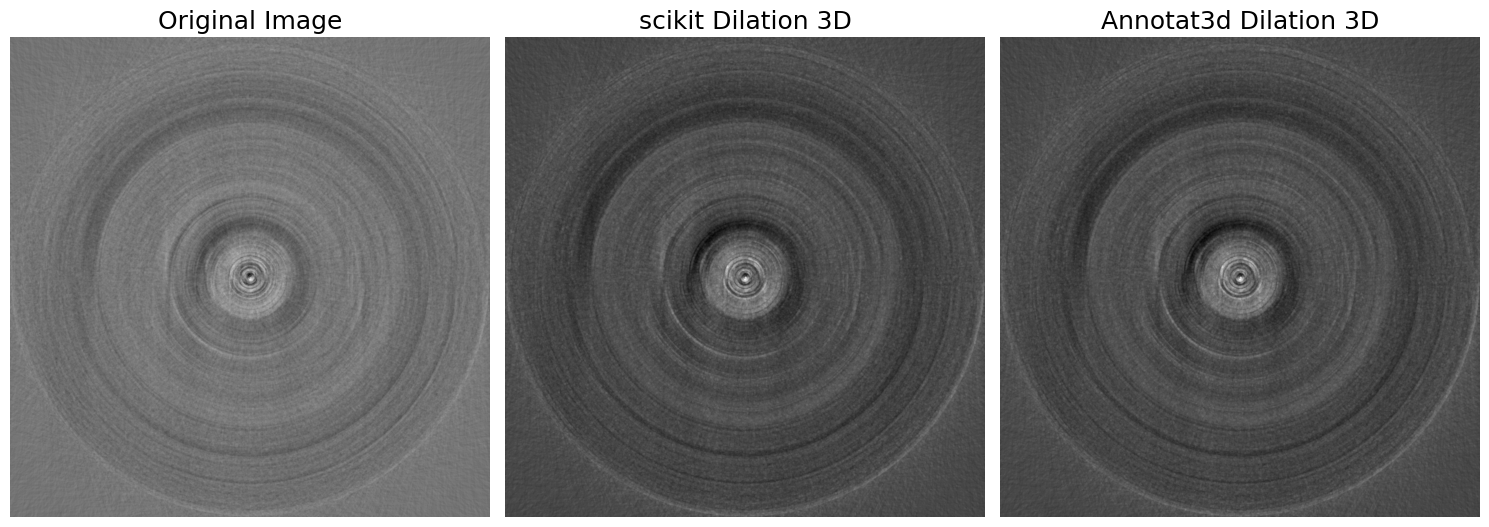

Total pixels: 8623521792
Different pixels: 0
Accuracy: 100.00%


In [16]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.dilation_grayscale(image, kernel, gpuMemory = 0.4)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.dilation(image, selem)

filename = f"{output_dir}/grayscale_dilation.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Dilation 3D", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Opening 

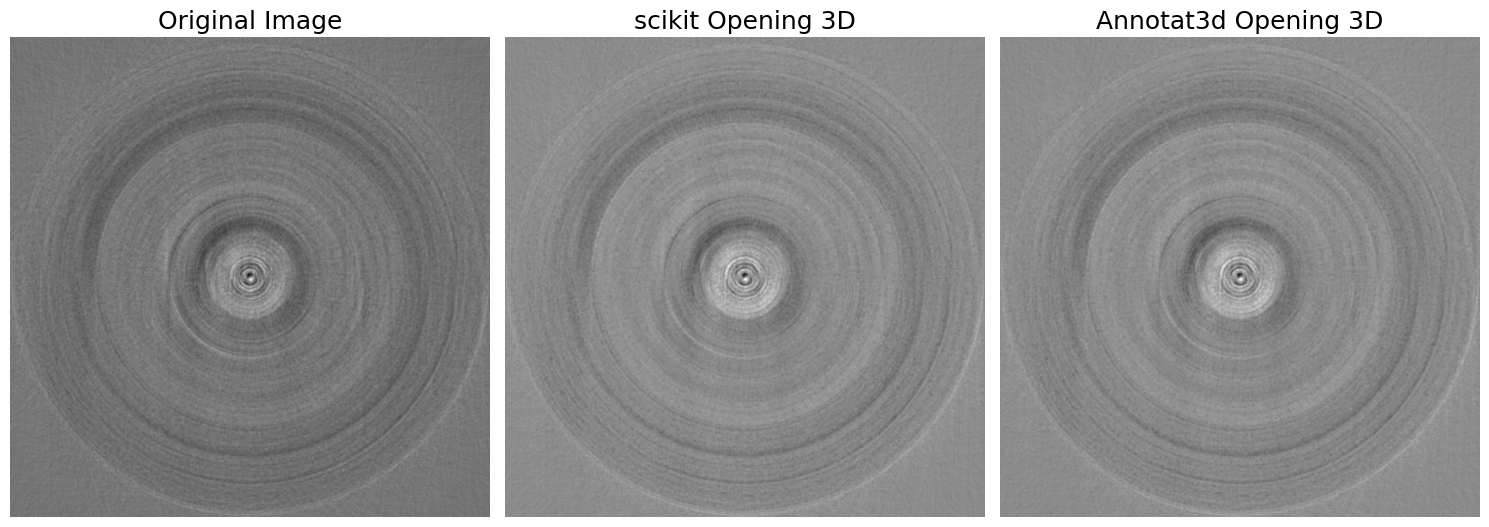

Total pixels: 8623521792
Different pixels: 0
Accuracy: 100.00%


In [17]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.opening_grayscale(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.opening(image, selem)

filename = f"{output_dir}/grayscale_opening.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Opening 3D", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Closing

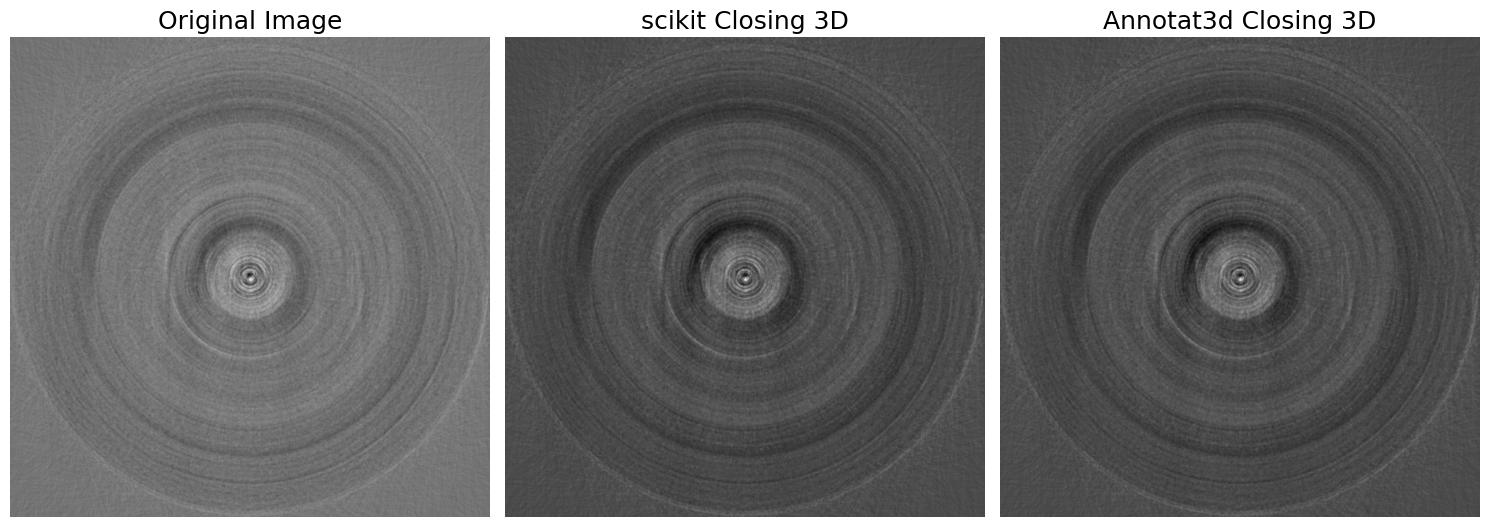

Total pixels: 8623521792
Different pixels: 0
Accuracy: 100.00%


In [18]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.closing_grayscale(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.closing(image, selem)

filename = f"{output_dir}/grayscale_closing.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Closing 3D", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Reconstruction

In [ ]:
#Custum operation
kernel = custum_kernel3D()
marker = image
for i in range(10):
    marker = harpia_grayscale.erosion_grayscale(marker, kernel)
result_custum = harpia_grayscale.reconstruction_grayscale(marker,image, "dilation")
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.reconstruction(marker,image, method='dilation')

filename = f"{output_dir}/grayscale_reconstruction_dilation.png"
compare_results(result_custum, result_groudtruth, marker, plot=True, operation = "Recosntruction", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

In [ ]:
#Custum operation
kernel = custum_kernel3D()
marker = image
for i in range(10):
    marker = harpia_grayscale.dilation_grayscale(marker, kernel)
result_custum = harpia_grayscale.reconstruction_grayscale(marker,image, "erosion")
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.reconstruction(marker,image, method='erosion')

filename = f"{output_dir}/grayscale_reconstruction_erosion.png"
compare_results(result_custum, result_groudtruth, marker, plot=True, operation = "Recosntruction", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Top hat (White tophat)

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.top_hat(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.white_tophat(image, selem)

filename = f"{output_dir}/grayscale_tophat.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "TopHat 3D", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Bottom hat (Black tophat)

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.bottom_hat(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.black_tophat(image, selem)

filename = f"{output_dir}/grayscale_bottomhat.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "BottomHat 3D", framework="scikit", 
                slice_num=100, figsize = (15,30), save_path=filename)

### Top hat recosntruction (Avizo's inspired algorithm)

This algorithm was inspired by Avizo's implementation of the TopHat segemntation. We did not have acces to the Avizo's results to make a bitwise comparison.
(Ref: https://www.thermofisher.com/software-em-3d-vis/xtra-library/xtras/interactive-top-hat-by-reconstruction)

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.top_hat_reconstruction(image, kernel)
result_custum = result_custum.squeeze()

filename = f"{output_dir}/grayscale_tophat_reconstruction.png"
show_results(result_custum, image, plot=True, operation = "TopHat 3D", slice_num=100, save_path=filename)

### Bottom hat recosntruction (Avizo's inspired algorithm)

This algorithm was inspired by Avizo's implementation of the TopHat segemntation. We did not have acces to the Avizo's results to make a bitwise comparison.
(Ref: https://www.thermofisher.com/software-em-3d-vis/xtra-library/xtras/interactive-top-hat-by-reconstruction)

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_grayscale.bottom_hat_reconstruction(image, kernel)
result_custum = result_custum.squeeze()

filename = f"{output_dir}/grayscale_bottomhat_reconstruction.png"
show_results(result_custum, image, plot=True, operation = "TopHat 3D", slice_num=100, save_path=filename)

## Morphology binary operations in 3D 

In [ ]:
def process_image(data, plot=False):
    zsize, ysize, xsize = data.shape  # Get dimensions
    binarized_data = np.empty_like(data, dtype = 'int32')  # Prepare output array of same shape

    for slice_idx in range(zsize):
        slice_data = data[slice_idx, :, :]

        # Find min and max for the current slice
        min_val = slice_data.min()
        max_val = slice_data.max()

        # Compute threshold
        threshold = (max_val + min_val) // 2

        # Apply threshold to the slice to create a binary image
        binarized_slice = np.where(slice_data >= threshold, 1, 0)

        # Store the binarized slice in the output array
        binarized_data[slice_idx, :, :] = binarized_slice

    # Plot the first slice if plot flag is True
    if plot:
        plt.figure(figsize=(10, 4))

        # Plot original first slice
        plt.subplot(1, 2, 1)
        plt.imshow(data[0, :, :], cmap='gray')
        plt.title('Original First Slice')
        plt.axis('off')

        # Plot binarized first slice
        plt.subplot(1, 2, 2)
        plt.imshow(binarized_data[0, :, :], cmap='gray')
        plt.title('Binarized First Slice')
        plt.axis('off')

        plt.show()

    return binarized_data

In [ ]:
# original img
xsize = 1540
ysize = 1540
zsize_original = 1000
zsize = 1000
image = load_image("/ibira/lnls/labs/tepui/home/egon.borges/workshop/Recon_fdk__tomo_z1_930_z1z2_1000_esp_1264_expt_1s_000_1540x1540x1000_float32.raw", xsize, ysize, zsize_original,'float32', 'float32')
image = process_image(image, True)
image = image[:zsize,:,:] #reduce size
image_slice = image[0,:,:]
image_slice3D = np.expand_dims(image_slice, axis=-1).reshape((1, ysize, xsize))

In [ ]:
'''
# original img
xsize = 190
ysize = 207
zsize_original = 100
zsize = 100
image = load_image("../../example_images/binary/crua_A_190x207x100_16b.raw", xsize, ysize, zsize_original,'uint16', 'int32')
image = image[:zsize,:,:] #reduce size
image_slice = image[0,:,:]
image_slice3D = np.expand_dims(image_slice, axis=-1).reshape((1, ysize, xsize))
'''


### Erosion

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_binary.erosion_binary(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.erosion(image, selem)

filename = f"{output_dir}/binary_erosion.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Erosion 3D", framework="scikit", 
                slice_num=0, figsize = (15,30), save_path=filename)

### Dilation 

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_binary.dilation_binary(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.dilation(image, selem)

filename = f"{output_dir}/binary_dilation.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Dilation 3D", framework="scikit", 
                slice_num=0, figsize = (15,30), save_path=filename)

### Opening 

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_binary.opening_binary(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.opening(image, selem)

filename = f"{output_dir}/binary_opening.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Opening 3D", framework="scikit", 
                slice_num=0, figsize = (15,30), save_path=filename)

### Closing

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_binary.closing_binary(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.closing(image, selem)

filename = f"{output_dir}/binary_closing.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Closing 3D", framework="scikit", 
                slice_num=0, figsize = (15,30), save_path=filename)

### Reconstruction

In [ ]:
#Custum operation
kernel = custum_line_kernel3D()
marker = harpia_grayscale.erosion_grayscale(image, kernel)

result_custum = harpia_binary.reconstruction_binary(marker,image, "dilation")
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.reconstruction(marker, image, method='dilation')

filename = f"{output_dir}/binary_reconstruction_dilation.png"
compare_results(result_custum, result_groudtruth, marker, plot=True, operation = "recosntruction 3D", 
                framework="scikit", slice_num=0, figsize = (15,30), save_path=filename)

In [ ]:
help(harpia_binary)

### Smoothing

In [ ]:
#Custum operation
kernel = custum_kernel3D()
result_custum = harpia_binary.smooth_binary(image, kernel)
result_custum = result_custum.squeeze()

#Scikit-learn operation
selem = morphology.cube(3)
result_groudtruth = morphology.opening(image, selem)
result_groudtruth = morphology.closing(result_groudtruth, selem)

filename = f"{output_dir}/binary_smoothing.png"
compare_results(result_custum, result_groudtruth, image, plot=True, operation = "Smoothing 3D", framework="scikit", 
                slice_num=0, figsize = (15,30), save_path=filename)

### Fill Holes

In [ ]:
#Custum operation
"""
result_custum = harpia_binary.fill_holes(image)
result_custum = result_custum.squeeze()

show_results_diff(result_custum, image, plot=True, operation = "fill holes 3D", slice_num=0, figsize = (15,30), save_path="binary_fill_holes0.png")
"""

In [ ]:
#show_results_diff(result_custum, image, plot=True, operation = "fill holes 3D", slice_num=3, figsize = (15,30), save_path="binary_fill_holes3.png")